<H1 style="text-align: center">ECMM422 - Machine Learning</H1>
<H2 style="text-align: center">Assignment 2: Ensemble Methods</H2>



| <font style="font-size:larger;">Date set     | <font style="font-size:larger;">Hand-in date |
|:------------------|:-----------------------------------|
|<font style="font-size:larger;"> 12th February 2020 |<font style="font-size:larger;">**  12 noon, Wednesday 19th February 2020 ** |

</font>

Candidate number:  <font color="red">*660028124*</font>

Marking is anonymous, so please don't write your name or reveal your identity!

This assigment will count for 25% of the module mark.  

Your report should consist of your IPython notebook showing what you did, what was the
result, and what you can conclude from the exercise. Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

### Submitting the notebooks

Note that an electronic submission is required.  You should also submit the notebook electronically at [electronic hand-in system]( http://empslocal.ex.ac.uk/submit/).  You just need to submit the single .ipynb file that is the notebook, so you should be able to upload it directly from the directory where you have saved it on a University machine or your laptop.  If you're not sure where in your homespace it is, type <code>pwd</code> (print working directory) in a cell to find out where the notebooks are.

<b>Note: you must also submit your cover sheet and E-Submit receipt via BART to complete the submission.</b>


<div class="alert alert-info">
 Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 
 </div>

In [4]:
# for matrices and numerical methods
import numpy as np

# for plotting functions
import matplotlib.pyplot as plt

# for loading the data we will use
from sklearn import datasets, tree

# for KFold cross-validation
from sklearn.model_selection import KFold,train_test_split

# for calculating accuracy, check help(accuracy_score) for details
from sklearn.metrics import accuracy_score

# for having progress bars for longer processes, use help(tqdm) for syntax
from tqdm import tqdm


import warnings
warnings.filterwarnings("ignore")


# Ensemble learning 

In this workshop you will investigate how ensemble of trees perform on a classification task and the importance of the parameters. We will use a digit classification task as an example. 
This will be done in the following stages: 

1. Training a tree on the data and evaluating the bias and variance of the model, using N-fold cross validation. 
2. Comparing performance with a random forest, evaluating the effect of tree depth and forest size
3. Build a boosted collection of trees and evaluate the performance. 

At each stage you should test your code and check the results


### Data: The digits dataset

For this CA you should use the <i>digits</i> data available in <tt>sklearn</tt> as an example (see below).

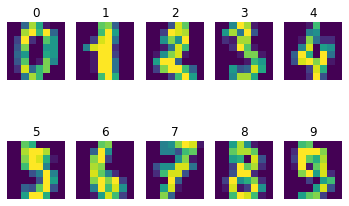

In [5]:
# loading the digit data
(X,Y) = datasets.load_digits(return_X_y=True)

# let's display some examples (the first 10 digits in the dataset)
plt.figure()
for i in range(10): 
    plt.subplot(2,5,i+1)
    plt.imshow(X[i,:].reshape((8,8)))
    plt.title('{}'.format(i))
    plt.axis('off')

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.25)
folds = 5
kfold = KFold(n_splits=folds)    # 5 fold CV here.
plt.show()

### Decision Tree

In this part you are asked to train a decision tree on the digits data. You should use the implementation of the classification tree in sklearn, which allows you to play with the parameters (read the documentation). Read especially on the <i>max_depth</i>, <i>min_samples_split</i> and <i>min_samples_leaf</i> parameters. 
* Draw a graph of the mean and variance of the classification accuracy depending on tree depth - use N-fold cross validation to get these estimates.
<div style="text-align: right"><b>[15 marks]</b></div>
* Calculate the confusion matrix for the tree with the best performance. <div style="text-align: right"><b>[10 marks]</b></div>


100%|██████████| 25/25 [00:01<00:00, 20.60it/s]



Performance: 
	- the error on the test set with the best depth 10


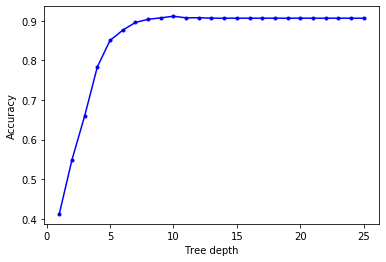

In [6]:
from math import sqrt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
def decision_tree(max_depth_range):
    # List of values to try for max_depth:
    # List to store the average RMSE for each value of max_depth:
    accuracy = []
    variance_list = []
    error = []
    for depth in tqdm(max_depth_range):
        kfs = KFold(n_splits=folds,shuffle=True,random_state=0)
        scores = []
        for train,validation in kfs.split(Xtrain):
            clf = DecisionTreeClassifier(max_depth = depth,min_samples_split = 3,min_samples_leaf=1
                                 ,random_state=1)
            clf.fit(Xtrain[train],Ytrain[train])
            scores.append( clf.score(Xtrain[validation],Ytrain[validation]))

        variance = np.array(scores).var()
        variance_list.append(variance)    
        validation_sum = sqrt(np.array(scores).mean())
        error.append(1-validation_sum)
        accuracy.append(validation_sum)



    best_depth_index = accuracy.index(max(accuracy))
    best_depth = max_depth_range[best_depth_index]
    best_error = error[best_depth_index]
    return best_depth,accuracy,variance_list,error,best_error

max_depth_range = list(range(1, 26))
best_depth,accuracy,variance_list,error,best_error = decision_tree(max_depth_range)
print()
# yerr = np.sqrt(variance_list)
# plt.errorbar(max_depth_range,accuracy,yerr)

print("Performance: \n\t- the error on the test set with the best depth %d"%(best_depth))
plt.plot(max_depth_range,accuracy,"b.-")

plt.xlabel('Tree depth')
plt.ylabel('Accuracy')    
plt.show()

100%|██████████| 25/25 [00:01<00:00, 19.86it/s]


Performance: 
	- The forest with best performance is 10 
	- the error on the validation set with 0.088542


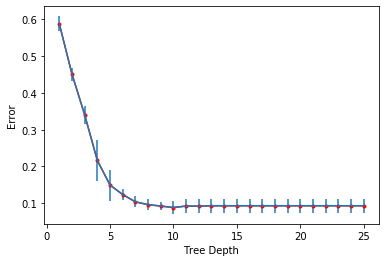

In [7]:
print()
best_depth,accuracy,variance_list,error,best_error= decision_tree(max_depth_range)
yerr = np.sqrt(variance_list)
plt.errorbar(max_depth_range,error,yerr)

print('Performance: \n\t- The forest with best performance is %d \n\t- the error on the validation set with %f' % (best_depth,best_error))
plt.plot(max_depth_range,error,"r.-")

plt.xlabel('Tree Depth')
plt.ylabel('Error')    
plt.show()

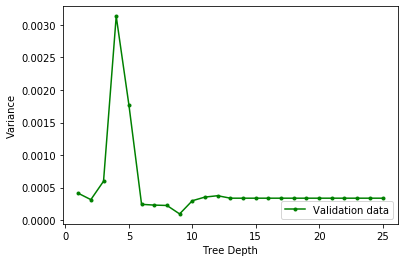

In [8]:
plt.plot(max_depth_range,variance_list,"g.-",label='Validation data')

plt.legend(loc='lower right')
plt.xlabel('Tree Depth')
plt.ylabel('Variance')    
plt.show()

Function for plotting the confusion matrix, taken from 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [6]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Test data performance score:  0.8444444444444444
Confusion matrix, without normalization
[[48  0  0  0  1  0  0  0  0  1]
 [ 0 40  1  2  2  0  0  0  4  1]
 [ 0  3 30  0  2  0  0  2  1  0]
 [ 0  2  2 30  0  2  1  4  0  0]
 [ 0  2  0  0 45  1  2  0  0  0]
 [ 1  0  1  2  1 41  1  0  0  0]
 [ 0  0  0  0  4  0 35  0  1  0]
 [ 0  0  0  0  4  0  0 38  0  1]
 [ 1  2  1  0  0  2  0  1 47  0]
 [ 0  1  0  4  0  1  0  2  3 26]]


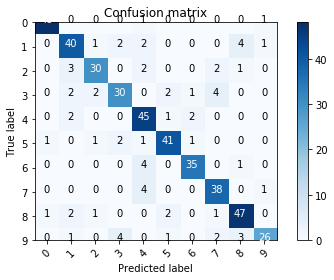

In [7]:
# we predict the classes on the test data
clf = DecisionTreeClassifier(max_depth = best_depth, min_samples_split = 2,min_samples_leaf=3,random_state = 0)
clf.fit(Xtrain, Ytrain)
pte = clf.predict(Xtest)
print("Test data performance score: ",clf.score(Xtest,Ytest))

# and we calculate the confusion matrix
cm = confusion_matrix(Ytest, pte)
np.set_printoptions(precision=2)
plot_confusion_matrix(cm, np.unique(Ytrain))
plt.show()

### Random Forests
In this part, you are asked to use Random Forest using sklearn trees as weak learners. You will use the function provided by sklearn: <tt> sklearn.ensemble.RandomForestClassifier</tt>. 

Once you have coded this, provide a graph of the accuracy curves for different <b>tree depths</b> and <b>forest size</b>: 
* The first graph with the forest size as the $x$-axis, classification error as the $y$-axis.
<div style="text-align: right"><b>[10 marks]</b></div>
* The second graph with tree depth (eg, for 1,2,5 and 10) as the $x$-axis, classification error as the $y$-axis.
<div style="text-align: right"><b>[10 marks]</b></div>
* Again, use N-Fold cross-validation to plot <b>error bars</b> on your graphs. 
<div style="text-align: right"><b>[10 marks]</b></div>
* As before, provide the <b>confusion matrix</b> for the forest with best performance. 
<div style="text-align: right"><b>[10 marks]</b></div>

In [8]:
from sklearn.ensemble import RandomForestClassifier
def random_forest_size(forest_size):
    error = []
    variance_list = []
    accuracy = [] 
    for x in tqdm(forest_size):
        rf = RandomForestClassifier(n_estimators = x,random_state=1 )
        scores = cross_val_score(rf,Xtrain, Ytrain)
        validation_sum = sqrt(scores.mean())
        accuracy.append(1-validation_sum)
        error.append(1-validation_sum)
        variance = scores.var()
        variance_list.append(variance)

    # ERROR INDEX:
    best_error_index = error.index(min(error))
    best_error_depth = forest_size[best_error_index]
    best_error = error[best_error_index]
    
    # ACCURACY INDEX:     
    best_accuracy_index = accuracy.index(max(accuracy))
    best_accuracy_depth = forest_size[best_accuracy_index]
    best_accuracy = accuracy[best_accuracy_index]
    
    return best_error_depth,best_accuracy_depth,best_error,best_accuracy,variance_list,error,accuracy

100%|██████████| 100/100 [00:26<00:00,  3.73it/s]


Performance: 
	- The forest size with best performance is 96 
	- the error on the validation set with 0.015332


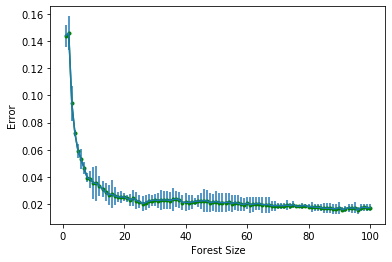

In [9]:
forest_size = list(range(1, 101))
best_forest_size,best_accuracy_depth,best_error,best_accuracy,variance_list,error,accuracy = random_forest_size(forest_size)

print('Performance: \n\t- The forest size with best performance is %d \n\t- the error on the validation set with %f' % (best_forest_size,best_error))


yerr = np.sqrt(variance_list)
plt.errorbar(forest_size,error,yerr)

plt.plot(forest_size,error,"g.-")
plt.xlabel('Forest Size')
plt.ylabel('Error')    
plt.show()

# print()
# print(clf.feature_importances_)

In [10]:
def random_forest_tree_depth(tree_depth):
    error = []
    variance_list = []
    accuracy = [] 
    for x in tqdm(tree_depth):
        rf = RandomForestClassifier(max_depth = x,random_state=1 )
        scores = cross_val_score(rf,Xtrain, Ytrain)
        validation_sum = sqrt(scores.mean())
        accuracy.append(1-validation_sum)
        error.append(1-validation_sum)
        variance = scores.var()
        variance_list.append(variance)

     # ERROR INDEX:
    best_error_index = error.index(min(error))
    best_error_depth = tree_depth[best_error_index]
    best_error = error[best_error_index]
    
    # ACCURACY INDEX:     
    best_accuracy_index = accuracy.index(max(accuracy))
    best_accuracy_depth = tree_depth[best_accuracy_index]
    best_accuracy = accuracy[best_accuracy_index]
    
    return best_error_depth,best_accuracy_depth,best_error,best_accuracy,variance_list,error,accuracy

100%|██████████| 25/25 [00:01<00:00, 17.90it/s]


Performance: 
	- The tree depth with best performance is 8 
	- the error on the best tree depth is 0.030917


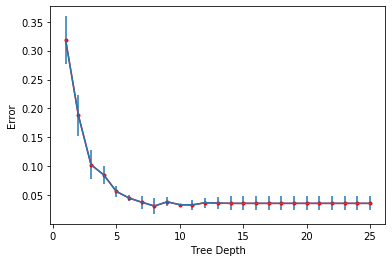

In [11]:
td = list(range(1,26))
best_tree_depth,best_accuracy_depth,best_error,best_accuracy,variance_list,error,accuracy = random_forest_tree_depth(td)

print('Performance: \n\t- The tree depth with best performance is %d \n\t- the error on the best tree depth is %f' % (best_tree_depth,best_error))


plt.plot(td,error,"r.-")
yerr = np.sqrt(variance_list)
plt.errorbar(td,error,yerr)

# plt.legend(loc='upper right')
plt.xlabel('Tree Depth')
plt.ylabel('Error')    
plt.show()


Test data performance score:  0.9555555555555556
Confusion matrix, without normalization
[[49  0  0  0  1  0  0  0  0  0]
 [ 0 49  0  0  0  1  0  0  0  0]
 [ 0  1 37  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  3  0  0  1  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 1  0  0  0  1  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  0]
 [ 0  2  1  0  0  1  0  0 50  0]
 [ 0  0  0  1  0  0  0  2  1 33]]


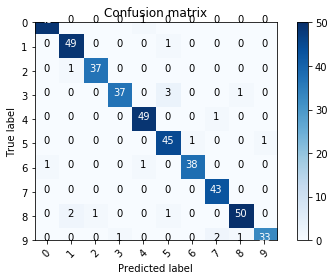

In [12]:
# we predict the classes on the test data
rf = RandomForestClassifier(max_depth = best_tree_depth,random_state=1,n_estimators = best_forest_size )
rf.fit(Xtrain, Ytrain)
pterf = rf.predict(Xtest)
print("Test data performance score: ",rf.score(Xtest,Ytest))

# and we calculate the confusion matrix
cm = confusion_matrix(Ytest, pterf)
np.set_printoptions(precision=2)
plot_confusion_matrix(cm, np.unique(Ytrain))
plt.show()

### Boosting
In this last section you are asked to use AdaBooost using sklearn tree stumps (trees with a single non-leaf node) as weak learners. You will use the function provided by sklearn: <tt>sklearn.ensemble.AdaBoostClassifier</tt>
which supports multiclass problems. 

Once you have done this, plot a similar curve as you did before, with boosting rounds as $x$-axis, classification error as $y$-axis and one curve for tree depth of 1,2,5 and 10, using N-Fold cross-validation to obtain error bars.
<div style="text-align: right"><b>[20 marks]</b></div>

In [21]:
from sklearn.ensemble import AdaBoostClassifier

def Adaboost_rounds(boosting_rounds):
    # List to store the average RMSE for each value of max_depth:
    variance_list = []
    error = []
    for a in tqdm(boosting_rounds):
        n_folds = KFold(n_splits=folds,shuffle=True,random_state=0)
        scores = []
        for tra,val in n_folds.split(Xtrain):
            clf = DecisionTreeClassifier(min_samples_split = 3,min_samples_leaf=1,random_state=1) # min_samples_split = 2
            boosting = AdaBoostClassifier(clf,learning_rate = 1,n_estimators = a
                                 ,random_state=1)
            boosting.fit(Xtrain[tra],Ytrain[tra])
            scores.append( boosting.score(Xtrain[val],Ytrain[val]))

        variance = np.array(scores).var()
        variance_list.append(variance) 
        validation_sum = sqrt(np.array(scores).mean())
        error.append(1-validation_sum)
        

    best_depth_index = error.index(min(error))
    best_depth = boosting_rounds[best_depth_index] 
    best_error = error[best_depth_index]
    return best_depth,variance_list,error,best_error

100%|██████████| 100/100 [05:58<00:00,  3.58s/it]


Performance: 
	- The best performance is 87 
	- the lowest error is 0.010455


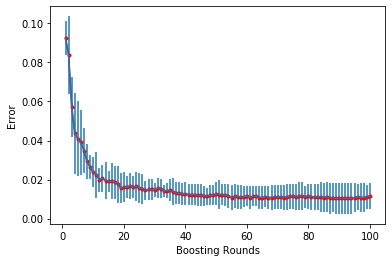

In [22]:
td = list(range(1,101))
best_depth,variance_list,error,best_error = Adaboost_rounds(td)


yerr = np.sqrt(variance_list)
plt.errorbar(td,error,yerr)

print('Performance: \n\t- The best performance is %d \n\t- the lowest error is %f' % (best_depth,best_error))
plt.plot(td,error,"r.-")

plt.xlabel('Boosting Rounds')
plt.ylabel('Error')    
plt.show()

In [19]:
def Adaboost_depth(depth):
    # List to store the average RMSE for each value of max_depth:
    variance_list = []
    error = []
    for a in tqdm(depth):
        n_folds = KFold(n_splits=folds,shuffle=True,random_state=0)
        scores = []
        for tra,val in n_folds.split(Xtrain):
            clf = DecisionTreeClassifier(max_depth = a,min_samples_split = 3,min_samples_leaf=1,random_state=1) # min_samples_split = 2
            boosting = AdaBoostClassifier(clf,learning_rate = 1,random_state=1)
            boosting.fit(Xtrain[tra],Ytrain[tra])
            scores.append( boosting.score(Xtrain[val],Ytrain[val]))

        variance = np.array(scores).var()
        variance_list.append(variance) 
        validation_sum = sqrt(np.array(scores).mean())
        error.append(1-validation_sum)
        

    best_depth_index = error.index(min(error))
    best_depth = depth[best_depth_index] 
    best_error = error[best_depth_index]
    return best_depth,variance_list,error,best_error

100%|██████████| 25/25 [01:10<00:00,  2.83s/it]



Performance: 
	- the best boosting round is  19 
	- the error on the validation set with 0.010824


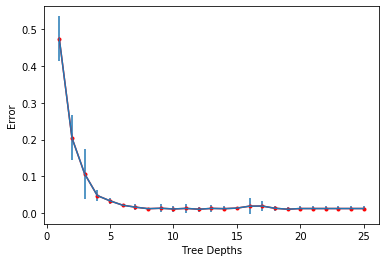

In [20]:
depth = list(range(1,26))
best_depth,variance_list,error,best_error = Adaboost_depth(depth)

yerr = np.sqrt(variance_list)
plt.errorbar(depth,error,yerr)

print()
print("Performance: \n\t- the best boosting round is  %d \n\t- the error on the validation set with %f"%(best_depth,best_error))
plt.plot(depth,error,"r.-")

plt.xlabel('Tree Depths')
plt.ylabel('Error')    
plt.show()

Finally provide a summary table of the best performance obtained by each algorithm in your experiments (Decision Tree, Random Forest and Boosted Trees), along with the estimated processing time (use the <tt>timeit</tt> package to measure training time). 
<div style="text-align: right"><b>[15 marks]</b></div>

In [23]:
# Here is a function you can use for timing the training time for each algorithm. 
# It would be better to use the timeit package or even a profiler to estimate accurately 
# the processing time of a system function, but this is overkill in this case as we 
# are only interested in fairly large time differences in fairly long processes
# (also, rerunning thousands of time the functions as per timeit would be expensive in this case)

# for timing functions
from time import time

# functions for timing execution 
# eg
tics = []
def tic(): 
    tics.append(time())
def toc(): 
    if tics: 
        return time() - tics.pop()
    else: 
        return None
    
# Example usage
depth = list(range(1,26))
tic() 
decision_tree(depth)
time_elapsed_1 = toc()
print('Time elapsed for Decision Tree ids: {:.2}s'.format(time_elapsed_1))

100%|██████████| 25/25 [00:01<00:00, 19.88it/s]


Time elapsed for Decision Tree ids: 1.3s


In [24]:
tic() 

random_forest_tree_depth(depth)

time_elapsed_3 = toc()
print('Time elapsed for Random Forest ids: {:.2}s'.format(time_elapsed_3))

100%|██████████| 25/25 [00:01<00:00, 18.71it/s]


Time elapsed for Random Forest ids: 1.4s


In [25]:

tic() 

Adaboost_depth(depth)
time_elapsed_2 = toc()
print('Time elapsed for Boosted Trees ids: {:.2}s'.format(time_elapsed_2))

100%|██████████| 25/25 [01:10<00:00,  2.84s/it]


Time elapsed for Boosted Trees ids: 7.1e+01s


### Report
###### A summary table of the best performance along with the estimated processing time obtained by each algorithm in my experiments.

|  | Decision Tree | Random Forest |Boosted Trees|
| --- | --- | --- |---|
| Best Perfromance (Lowest Error) |  0.088137 | 0.030917 |0.010824|
| Estimated Processing Time (s)|  1.3|1.4 |7.1e+01

The experiment had a range of 1 to 25 tree depths, because after 10~12 tree depth the graph stayed linear (It doesn't change values) even up to 100 tree depth. To ensure the performance comparison was fair I made the overall tree depth the same for all the respective methods. 
According to the table of processing time and best performance (which was measured by the lowest error generated from the set tree depth range), Boosted trees method had the best  performance whereas it took more estimated processing time. The Decision Tree has the worst performance compared to the other two but took the least estimated processing time.


### Parameters

#### Random Forest
The primary parameters for the Random Forest and Boosting method were $n\_estimators$ and $max\_features$. The first is the amount of trees in the forest. The bigger the better, but also the longer it goes to calculate. Furthermore, I noticed that the results ceased to be substantially better after a set number of trees (10~12). The second is the size of the random subsets of the features to be considered when separating a node. Smaller subset size means increase in reduction of variance, yet also the greater the increase in bias [1]. It is set to None.

#### Decision Tree
$Max\_depth$: This specifies the maximum depth of the tree [2]. In this experiment I use a depth of 25 to make the decision tree.This is to prevent an over-fitted decision tree. The depth parameter is among the places that adjusts the tree or restrict the direction it develops to stop over-fitting [2].

$Min\_samples\_split$: The lowest possible amount of samples which a node must have to split. The default value for this is two. This is used to adjust the tree. In this experiment the value is set to three. 

$Min\_samples\_leaf$: The lowest amount of samples required to qualify a leaf node. In the experiment, the value is set to one. This parameter is used to restrict tree expansion [2].

Positive results are quite often obtained when setting $max\_depth$ = None in combination with min $samples\_split$ = 2 (i.e. when the trees are fully developed).

$Max\_features$: The Misclassification error of a random forest declines with the Misclassification  error of an individual tree and the correlation between the trees. Subsampling is a way to decorate the trees. The increase in m (default number of features) makes small trees more effective, yet also expands their correlation. The ideal value of m accomplishes an exchange  between these two equally strong effects, and normally resides somewhere in between the spectrum.

As for scikit-learn's default state of m = p (this is what was used in this experiment): as stated above, subsampling attributes are one of the key characteristics of random forests and improve their performance by decorrelating trees [3].
#### Boosting
$Learning\_rate$: is the contribution for models to weights and the is set to one. Lowering the learning rate means the weights will be increased or reduced to a small extent, rendering the model train slower (but very often results in a better performance scores). There's a trade-off between learning rate and n estimators.

### Decision Tree
As mentioned in the Ensemble Methods lecture. The role of this experiment was to train a tree on the data and evaluate the bias and variance of the model, using N-fold cross validation (To find the misclassification error).


### Random Forest
In random forests, every tree throughout the set is rendered from a sample from the training set, replacing it. The best partition can be found from all input features or a random subset of size $max\_features$  (when splitting each node while building a tree).

The objective for two sources of randomness is to reduce the variance of the forest estimator.  This is because individual decision trees tend to show high variance which leads to over-fitting. Inserted entropy in forests produces decision trees with otherwise decoupled prediction errors [2].

Some errors can often be cancelled by taking an average of those predictions. Random forests produce a decreased variance by mixing a variety of trees, often at the expense of a slight increase in bias. In this experiment, the decrease in variance is often significant, resulting in a better and more consistent model.


### Boosting

AdaBoost's core concept is to adjust the pattern of weak learners (in this experiment it was a decision tree) on continually reconfigured versions of the data. Predictions from them are coupled by a weighted majority decision (or sum) to create the final estimation [2].
 
Initially, all these weights are set so that the first step is literally to train a weak learner on the original data. Of each consecutive iteration, the sample weights are separately updated and the learning algorithm is re-applied to the re-weighted data.At that stage, certain training samples that were inaccurately estimated by the boosted model induced at a previous stage increases their weights, while the weights are reduced for those that were accurately estimated. When iterations continue, cases that are hard to predict may gain an ever-increasing influence.

### Reference:

1  - Scikit-learn.org. (2020). 1.11. Ensemble methods — scikit-learn 0.22.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/ensemble.html [Accessed 13 Feb. 2020].


2 - Ceballos, F. (2020). Scikit-Learn Decision Trees Explained. [online] Medium. Available at: https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d [Accessed 10 Feb. 2020].

3 - Breiman, L. (2001). RANDOM FORESTS. [ebook] Berkeley, CA. Available at: https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf [Accessed 13 Feb. 2020].